In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [3]:
import fbprophet
from fbprophet import Prophet
import pystan

In [4]:
# univariate forcasting

df = pd.read_csv("Train_SU63ISt.csv")
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [5]:
px.line(df,y='Count')

In [6]:
df.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [7]:
df.set_index(df.ID)

,ID,Datetime,Count
ID,,,
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702


In [8]:
df.drop(columns='ID',inplace=True)

In [9]:

df.rename(columns={'Datetime':'ds','Count':'y'},inplace=True)

In [10]:
df.head()

,ds,y
0,25-08-2012 00:00,8
1,25-08-2012 01:00,2
2,25-08-2012 02:00,6
3,25-08-2012 03:00,2
4,25-08-2012 04:00,2


In [11]:
df.isnull().sum()

ds    0
y     0
dtype: int64

In [12]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [110]:
df.head()

,ds,y
0,2012-08-25 00:00:00,8
1,2012-08-25 01:00:00,2
2,2012-08-25 02:00:00,6
3,2012-08-25 03:00:00,2
4,2012-08-25 04:00:00,2


In [111]:
# features train test
 
df['ds'] = pd.to_datetime(df['ds'])

split_date = '01-Jan-2014'
train = df.loc[df.ds <= split_date].copy()
test = df.loc[df.ds > split_date].copy()

In [131]:
test_data = pd.DataFrame()
test_data['ds'] = test['ds']
test_data

,ds
11857,2014-01-01 01:00:00
11858,2014-01-01 02:00:00
11859,2014-01-01 03:00:00
11860,2014-01-01 04:00:00
11861,2014-01-01 05:00:00
...,...
18283,2014-09-25 19:00:00
18284,2014-09-25 20:00:00
18285,2014-09-25 21:00:00
18286,2014-09-25 22:00:00


In [115]:
model1 = Prophet()
model1.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [134]:
pred = model1.predict(test_data)

In [133]:
test

,ds,y
11857,2014-01-01 01:00:00,174
11858,2014-01-01 02:00:00,134
11859,2014-01-01 03:00:00,116
11860,2014-01-01 04:00:00,74
11861,2014-01-01 05:00:00,72
...,...,...
18283,2014-09-25 19:00:00,868
18284,2014-09-25 20:00:00,732
18285,2014-09-25 21:00:00,702
18286,2014-09-25 22:00:00,580


In [135]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mean_squared_error(y_true=test['y'],
                   y_pred=pred['yhat'])

27823.757211392476

In [136]:
mean_absolute_error(y_true=test['y'],
                   y_pred=pred['yhat'])

116.09869174416968

In [140]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true = test['y'],y_pred = pred['yhat'])

37.567194368707185

NOW model having whole

In [13]:
model = Prophet()

In [14]:
df.head()

,ds,y
0,25-08-2012 00:00,8
1,25-08-2012 01:00,2
2,25-08-2012 02:00,6
3,25-08-2012 03:00,2
4,25-08-2012 04:00,2


In [15]:
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [16]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'daily',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [17]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [18]:
future_dates.tail()

,ds
18648,2015-12-05 23:00:00
18649,2015-12-06 23:00:00
18650,2015-12-07 23:00:00
18651,2015-12-08 23:00:00
18652,2015-12-09 23:00:00


In [19]:
prediction=model.predict(future_dates)

In [20]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-09 00:00:00,37.330668,-88.147122,139.380877,37.330668,37.330668,-13.441313,-13.441313,-13.441313,5.293229,...,-14.601463,-14.601463,-14.601463,-4.133079,-4.133079,-4.133079,0.0,0.0,0.0,23.889355
1,2012-01-09 01:00:00,37.318984,-106.371991,116.141597,37.318984,37.318984,-34.213188,-34.213188,-34.213188,-17.183700,...,-12.859352,-12.859352,-12.859352,-4.170136,-4.170136,-4.170136,0.0,0.0,0.0,3.105796
2,2012-01-09 02:00:00,37.307301,-133.828397,100.422774,37.307301,37.307301,-55.079353,-55.079353,-55.079353,-39.784280,...,-11.087433,-11.087433,-11.087433,-4.207639,-4.207639,-4.207639,0.0,0.0,0.0,-17.772052
3,2012-01-09 03:00:00,37.295618,-161.709182,79.812659,37.295618,37.295618,-70.840906,-70.840906,-70.840906,-57.301346,...,-9.293973,-9.293973,-9.293973,-4.245586,-4.245586,-4.245586,0.0,0.0,0.0,-33.545288
4,2012-01-09 04:00:00,37.283935,-153.480954,65.207981,37.283935,37.283935,-80.158777,-80.158777,-80.158777,-68.387440,...,-7.487362,-7.487362,-7.487362,-4.283975,-4.283975,-4.283975,0.0,0.0,0.0,-42.874842


In [22]:
df.tail()

,ds,y
18283,25-09-2014 19:00,868
18284,25-09-2014 20:00,732
18285,25-09-2014 21:00,702
18286,25-09-2014 22:00,580
18287,25-09-2014 23:00,534


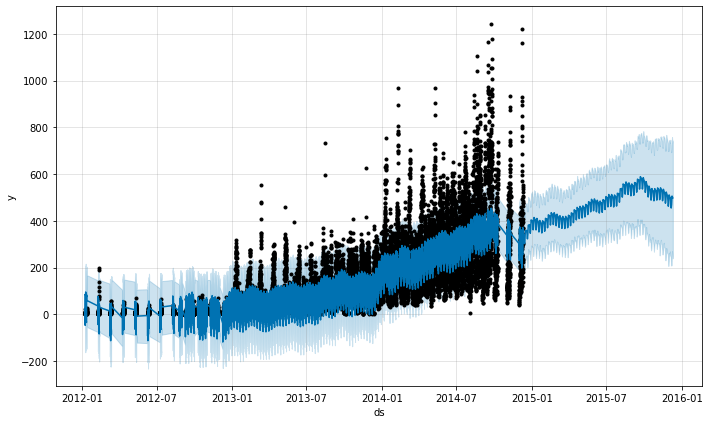

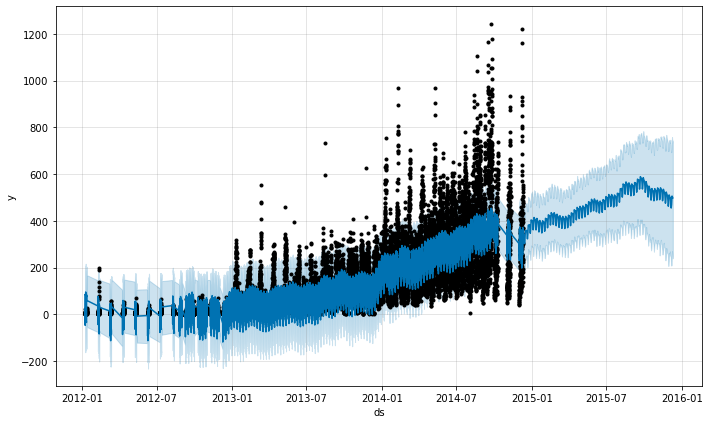

In [21]:
### plot the predicted projection
model.plot(prediction)

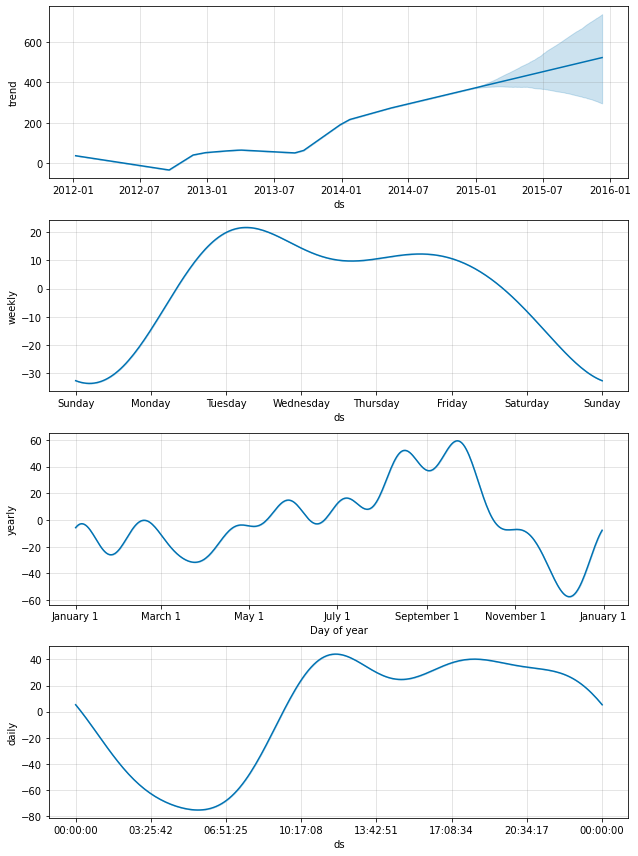

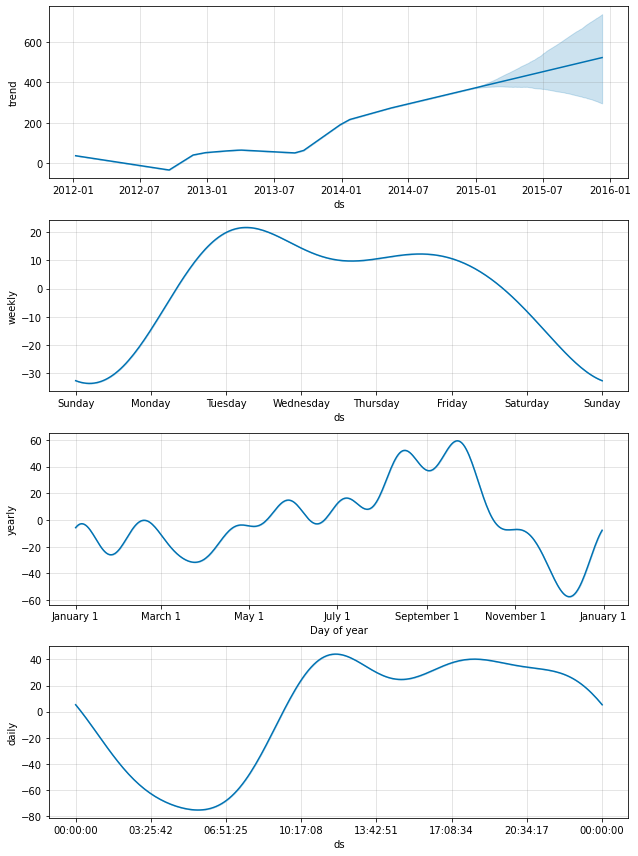

In [23]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

In [24]:
test = pd.read_csv("Test_0qrQsBZ.csv")

In [25]:
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [32]:
test.set_index(test.ID)

,ID,Datetime
ID,,
18288,18288,26-09-2014 00:00
18289,18289,26-09-2014 01:00
18290,18290,26-09-2014 02:00
18291,18291,26-09-2014 03:00
18292,18292,26-09-2014 04:00
...,...,...
23395,23395,26-04-2015 19:00
23396,23396,26-04-2015 20:00
23397,23397,26-04-2015 21:00


In [33]:
test.drop(columns='ID',inplace=True)

In [34]:
test.head()

,Datetime
0,26-09-2014 00:00
1,26-09-2014 01:00
2,26-09-2014 02:00
3,26-09-2014 03:00
4,26-09-2014 04:00


In [30]:
df.head()

,ds,y
0,25-08-2012 00:00,8
1,25-08-2012 01:00,2
2,25-08-2012 02:00,6
3,25-08-2012 03:00,2
4,25-08-2012 04:00,2


In [29]:
future_dates.head()

,ds
0,2012-01-09 00:00:00
1,2012-01-09 01:00:00
2,2012-01-09 02:00:00
3,2012-01-09 03:00:00
4,2012-01-09 04:00:00


In [37]:
test.rename(columns={'Datetime':'ds'},inplace=True)

In [39]:
preds = model.predict(test)

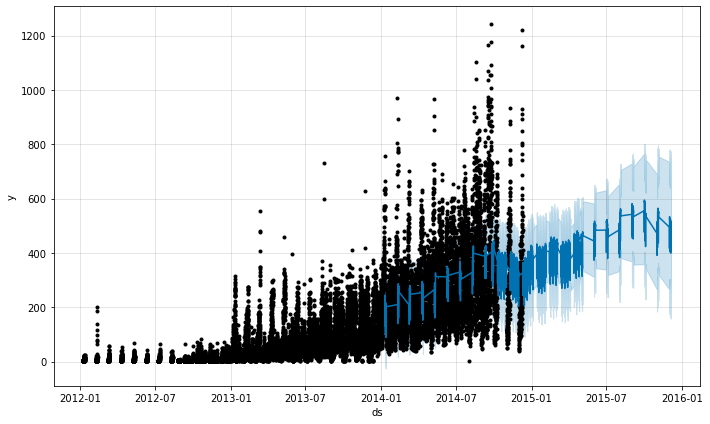

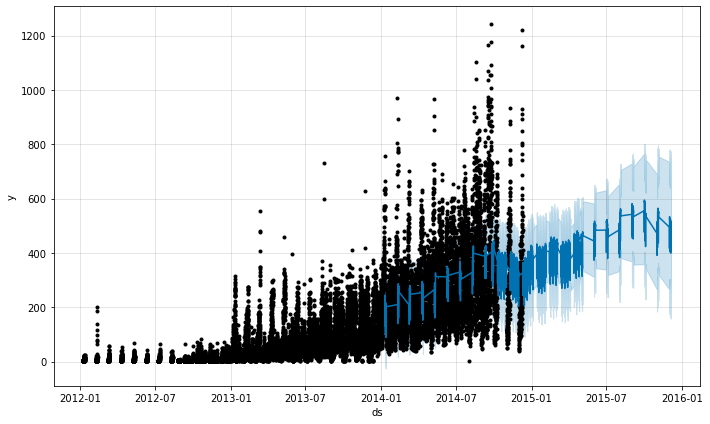

In [40]:
model.plot(preds)

In [41]:
test.tail()

,ds
5107,26-04-2015 19:00
5108,26-04-2015 20:00
5109,26-04-2015 21:00
5110,26-04-2015 22:00
5111,26-04-2015 23:00


In [42]:
preds

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-10 00:00:00,203.788915,96.143315,328.931236,203.788915,203.788915,10.186021,10.186021,10.186021,5.293229,...,10.625272,10.625272,10.625272,-5.732479,-5.732479,-5.732479,0.0,0.0,0.0,213.974936
1,2014-01-10 01:00:00,203.831434,72.960663,303.380041,203.831434,203.831434,-12.701269,-12.701269,-12.701269,-17.183700,...,10.266620,10.266620,10.266620,-5.784189,-5.784189,-5.784189,0.0,0.0,0.0,191.130165
2,2014-01-10 02:00:00,203.873953,58.719358,288.931750,203.873953,203.873953,-35.750317,-35.750317,-35.750317,-39.784280,...,9.870226,9.870226,9.870226,-5.836262,-5.836262,-5.836262,0.0,0.0,0.0,168.123636
3,2014-01-10 03:00:00,203.916472,32.685345,267.168322,203.916472,203.916472,-53.754201,-53.754201,-53.754201,-57.301346,...,9.435842,9.435842,9.435842,-5.888696,-5.888696,-5.888696,0.0,0.0,0.0,150.162271
4,2014-01-10 04:00:00,203.958991,29.746696,243.850719,203.958991,203.958991,-65.365633,-65.365633,-65.365633,-68.387440,...,8.963295,8.963295,8.963295,-5.941488,-5.941488,-5.941488,0.0,0.0,0.0,138.593358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,2015-12-04 19:00:00,520.991068,268.376354,748.315048,322.652842,745.548826,-18.889793,-18.889793,-18.889793,38.815549,...,-2.607017,-2.607017,-2.607017,-55.098325,-55.098325,-55.098325,0.0,0.0,0.0,502.101276
5108,2015-12-04 20:00:00,521.009196,256.005315,746.218628,322.687213,745.608862,-23.215089,-23.215089,-23.215089,35.582204,...,-3.653167,-3.653167,-3.653167,-55.144126,-55.144126,-55.144126,0.0,0.0,0.0,497.794106
5109,2015-12-04 21:00:00,521.027323,246.244848,751.804639,322.721583,745.668898,-26.801008,-26.801008,-26.801008,33.116147,...,-4.727647,-4.727647,-4.727647,-55.189508,-55.189508,-55.189508,0.0,0.0,0.0,494.226315
5110,2015-12-04 22:00:00,521.045450,266.183533,731.286885,322.755953,745.728934,-31.057277,-31.057277,-31.057277,30.005855,...,-5.828662,-5.828662,-5.828662,-55.234470,-55.234470,-55.234470,0.0,0.0,0.0,489.988173


In [43]:
test.shape

(5112, 1)

In [47]:
count = round(preds.yhat)

In [49]:
test['Count'] = count

In [50]:
test.head()

,ds,Count
0,26-09-2014 00:00,214.0
1,26-09-2014 01:00,191.0
2,26-09-2014 02:00,168.0
3,26-09-2014 03:00,150.0
4,26-09-2014 04:00,139.0


In [51]:
px.line(test,y='Count')

,ds,y
0,25-08-2012 00:00,8
1,25-08-2012 01:00,2
2,25-08-2012 02:00,6
3,25-08-2012 03:00,2
4,25-08-2012 04:00,2


In [60]:
test.rename(columns={'Count':'y'},inplace=True)

In [ ]:
test.index += 18288

In [86]:
final = pd.DataFrame()
final = pd.concat([df,test],axis='rows')

In [87]:
final

,ds,y
0,25-08-2012 00:00,8.0
1,25-08-2012 01:00,2.0
2,25-08-2012 02:00,6.0
3,25-08-2012 03:00,2.0
4,25-08-2012 04:00,2.0
...,...,...
23395,26-04-2015 19:00,502.0
23396,26-04-2015 20:00,498.0
23397,26-04-2015 21:00,494.0
23398,26-04-2015 22:00,490.0


In [88]:
test.head()

,ds,y
18288,26-09-2014 00:00,214.0
18289,26-09-2014 01:00,191.0
18290,26-09-2014 02:00,168.0
18291,26-09-2014 03:00,150.0
18292,26-09-2014 04:00,139.0


In [89]:
df.tail()

,ds,y
18283,25-09-2014 19:00,868
18284,25-09-2014 20:00,732
18285,25-09-2014 21:00,702
18286,25-09-2014 22:00,580
18287,25-09-2014 23:00,534


In [90]:
px.line(final,y='y')

In [79]:
final.columns

Index(['ds', 'y'], dtype='object')

In [92]:
px.histogram(df,x='y')

In [93]:
px.histogram(test,x='y')

In [81]:
df.tail()

,ds,y
18283,25-09-2014 19:00,868
18284,25-09-2014 20:00,732
18285,25-09-2014 21:00,702
18286,25-09-2014 22:00,580
18287,25-09-2014 23:00,534


In [85]:
test

,ds,y
18288,26-09-2014 00:00,214.0
18289,26-09-2014 01:00,191.0
18290,26-09-2014 02:00,168.0
18291,26-09-2014 03:00,150.0
18292,26-09-2014 04:00,139.0
...,...,...
23395,26-04-2015 19:00,502.0
23396,26-04-2015 20:00,498.0
23397,26-04-2015 21:00,494.0
23398,26-04-2015 22:00,490.0
